# Small Scale Optimization

Apply the model for small instances (e.g. 6 facilities, and 10 oil spills in Hudson)

Outline of this script:
1. Input data
2. Optimization Model
3. Output in a form of Network Diagram

# Data

In [1]:
# import custom functions
import data_preparation
import custom_func
import model
import model_analysis
# import libraries
import pandas as pd
import geopandas as gpd

In [2]:
# Import data
spill_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='spills', header=0).copy()
spill_data = spill_data.sample(n=50)
station_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
#station_data = station_data.iloc[[7,9,10, 13,15,16, 18]] # for small scale problem, we select stations nearby Hudson Bay & Strait
input_parameters = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='Estimated parameters', header=0).copy()
sensitivity_dataR = gpd.read_file('Inputs/ArcGIS_data/Sensitivity_data/Sensitivity_data5.shp').copy()

In [3]:
display(spill_data)
display(station_data)

,Unnamed: 0,Spill #,Coordinates,Spill size,Spill Size Type,Resource needed,1st Ranking,Skimmer,Dispersant,Burning materials
201,NaN,o202,"(64.31928988420061, -78.57678652571602)",9150,Large,457.5,ISB,0,0,257
202,NaN,o203,"(65.38888826422587, -65.95218121659215)",5190,Large,259.5,ISB,0,0,257
18,NaN,o19,"(69.01970338203198, -105.17880159715504)",5540,Large,277.0,MCR,54,0,0
58,NaN,o59,"(62.767265615617305, -91.76430214931487)",5320,Large,266.0,ISB,0,0,257
22,NaN,o23,"(71.38061764992644, -127.39770370175974)",7540,Large,377.0,ISB,0,0,257
196,NaN,o197,"(70.82301519053982, -130.33066350036327)",3920,Large,196.0,CDU,0,800,0
109,NaN,o110,"(77.28026321669991, -69.57542191844341)",2100,Medium,105.0,CDU,0,200,0
6,NaN,o7,"(70.28645940577307, -67.00838156209814)",710,Small,35.5,ISB,0,0,7
107,NaN,o108,"(74.13041980846197, -87.60536813220666)",250,Small,12.5,ISB,0,0,7
191,NaN,o192,"(68.70553599203063, -134.23381941293684)",6430,Large,321.5,ISB,0,0,257


,no.,Station #,Station,Name,Coordinates,skimmers,booms,dispersant,Resources total,Converted resources
0,1,s1,Station 1,Beafort sea,"(70,-134)",0,1,33,34,NaN
1,2,s2,Station 2,Northwestern passage,"(70.64, -119.43)",8,8,55,71,NaN
2,3,s3,Station 3,Kitikmeot Region,"(67.09, -112.32)",1,4,58,63,NaN
3,4,s4,Station 4,Fort Smith,"(62.60, -113.19)",10,3,32,45,NaN
4,5,s5,Station 5,Hay River,"(60.53, -114.38)",40,10,100,150,NaN
5,6,s6,Station 6,NaN,"(68.86,-103.19)",10,3,44,57,NaN
6,7,s7,Station 7,NaN,"(63.93, -101.14)",0,3,47,50,NaN
7,8,s8,Station 8,NaN,"(60.06, -95.89)",3,5,58,66,NaN
8,9,s9,Station 9,NaN,"(75.11, -95.71)",5,7,59,71,NaN
9,10,s10,Station 10,Kivalliq Region,"(63.03, -91.74)",4,9,36,49,NaN


In [4]:
# %% One value
NumberStMax =5
DistanceMax = 120 # (DistanceMax*80)km  convert it to kilometer, typical speed 20km/hr -> 480km/day
TimeRMax = 220  # covert it into hours or minutes


In [5]:
# 
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, Cu_sor \
= data_preparation.generate_input_data(station_data, spill_data, input_parameters)
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
coordinates_st = custom_func.extract_station_coordinate(station_data)

In [6]:
max(Distance.values())

74.11833526860254

In [7]:
print('coordinates_st')
display(coordinates_st)

print('Demand')
display(Demand)
print('Availability')
display(Availability)
print('Eff')
display(Eff)

print('Distance')
display(Distance)

print('TimeR')
display(TimeR)

print('Cf_s'); display(Cf_s)
print('Cu_sor')
display(Cu_sor)

coordinates_st


([[70.0, -134.0],
  [70.63999938964844, -119.43000030517578],
  [67.08999633789062, -112.31999969482422],
  [62.599998474121094, -113.19000244140625],
  [60.529998779296875, -114.37999725341797],
  [68.86000061035156, -103.19000244140625],
  [63.93000030517578, -101.13999938964844],
  [60.060001373291016, -95.88999938964844],
  [75.11000061035156, -95.70999908447266],
  [63.029998779296875, -91.73999786376953],
  [62.66999816894531, -92.70800018310547],
  [73.4000015258789, -88.16000366210938],
  [73.4000015258789, -81.83000183105469],
  [64.2020034790039, -83.91000366210938],
  [71.70999908447266, -74.97000122070312],
  [67.66999816894531, -76.37999725341797],
  [64.62000274658203, -77.41000366210938],
  [68.93000030517578, -69.16999816894531],
  [63.150001525878906, -69.68000030517578],
  [68.93000030517578, -65.56999969482422]],
 {'s1': [70.0, -134.0],
  's2': [70.63999938964844, -119.43000030517578],
  's3': [67.08999633789062, -112.31999969482422],
  's4': [62.599998474121094, -11

Demand


{('o202', 'm'): 0,
 ('o202', 'c'): 0,
 ('o202', 'i'): 37,
 ('o203', 'm'): 0,
 ('o203', 'c'): 0,
 ('o203', 'i'): 37,
 ('o19', 'm'): 100,
 ('o19', 'c'): 0,
 ('o19', 'i'): 0,
 ('o59', 'm'): 0,
 ('o59', 'c'): 0,
 ('o59', 'i'): 157,
 ('o23', 'm'): 0,
 ('o23', 'c'): 0,
 ('o23', 'i'): 7,
 ('o197', 'm'): 0,
 ('o197', 'c'): 0,
 ('o197', 'i'): 7,
 ('o110', 'm'): 0,
 ('o110', 'c'): 0,
 ('o110', 'i'): 7,
 ('o7', 'm'): 0,
 ('o7', 'c'): 31,
 ('o7', 'i'): 0,
 ('o108', 'm'): 0,
 ('o108', 'c'): 31,
 ('o108', 'i'): 0,
 ('o192', 'm'): 0,
 ('o192', 'c'): 110,
 ('o192', 'i'): 0,
 ('o212', 'm'): 0,
 ('o212', 'c'): 110,
 ('o212', 'i'): 0,
 ('o222', 'm'): 0,
 ('o222', 'c'): 0,
 ('o222', 'i'): 37,
 ('o135', 'm'): 0,
 ('o135', 'c'): 0,
 ('o135', 'i'): 37,
 ('o218', 'm'): 0,
 ('o218', 'c'): 5,
 ('o218', 'i'): 0,
 ('o181', 'm'): 0,
 ('o181', 'c'): 0,
 ('o181', 'i'): 157,
 ('o52', 'm'): 2,
 ('o52', 'c'): 0,
 ('o52', 'i'): 0,
 ('o79', 'm'): 100,
 ('o79', 'c'): 0,
 ('o79', 'i'): 0,
 ('o67', 'm'): 100,
 ('o67', 'c'):

Availability


{('s1', 'm'): 1800.0,
 ('s1', 'c'): 1800.0,
 ('s1', 'i'): 400.0,
 ('s2', 'm'): 1600.0,
 ('s2', 'c'): 200.0,
 ('s2', 'i'): 600.0,
 ('s3', 'm'): 200.0,
 ('s3', 'c'): 1200.0,
 ('s3', 'i'): 1400.0,
 ('s4', 'm'): 1200.0,
 ('s4', 'c'): 600.0,
 ('s4', 'i'): 2000.0,
 ('s5', 'm'): 1800.0,
 ('s5', 'c'): 1200.0,
 ('s5', 'i'): 400.0,
 ('s6', 'm'): 800.0,
 ('s6', 'c'): 1600.0,
 ('s6', 'i'): 1600.0,
 ('s7', 'm'): 1800.0,
 ('s7', 'c'): 1000.0,
 ('s7', 'i'): 400.0,
 ('s8', 'm'): 1800.0,
 ('s8', 'c'): 1600.0,
 ('s8', 'i'): 1400.0,
 ('s9', 'm'): 1000.0,
 ('s9', 'c'): 1800.0,
 ('s9', 'i'): 800.0,
 ('s10', 'm'): 1000.0,
 ('s10', 'c'): 200.0,
 ('s10', 'i'): 600.0,
 ('s11', 'm'): 600.0,
 ('s11', 'c'): 600.0,
 ('s11', 'i'): 1200.0,
 ('s12', 'm'): 1400.0,
 ('s12', 'c'): 400.0,
 ('s12', 'i'): 1200.0,
 ('s13', 'm'): 1200.0,
 ('s13', 'c'): 200.0,
 ('s13', 'i'): 400.0,
 ('s14', 'm'): 1400.0,
 ('s14', 'c'): 200.0,
 ('s14', 'i'): 1600.0,
 ('s15', 'm'): 1200.0,
 ('s15', 'c'): 1800.0,
 ('s15', 'i'): 1200.0,
 ('s16', 

Eff


{('s1', 'm'): 0.4,
 ('s1', 'c'): 0.1,
 ('s1', 'i'): 0.1,
 ('s2', 'm'): 0.1,
 ('s2', 'c'): 0.6000000000000001,
 ('s2', 'i'): 0.8,
 ('s3', 'm'): 0.4,
 ('s3', 'c'): 0.6000000000000001,
 ('s3', 'i'): 0.30000000000000004,
 ('s4', 'm'): 0.30000000000000004,
 ('s4', 'c'): 1.0,
 ('s4', 'i'): 1.0,
 ('s5', 'm'): 0.30000000000000004,
 ('s5', 'c'): 0.6000000000000001,
 ('s5', 'i'): 0.7000000000000001,
 ('s6', 'm'): 0.2,
 ('s6', 'c'): 0.1,
 ('s6', 'i'): 0.5,
 ('s7', 'm'): 0.30000000000000004,
 ('s7', 'c'): 0.9,
 ('s7', 'i'): 0.7000000000000001,
 ('s8', 'm'): 0.30000000000000004,
 ('s8', 'c'): 0.4,
 ('s8', 'i'): 0.1,
 ('s9', 'm'): 0.2,
 ('s9', 'c'): 0.4,
 ('s9', 'i'): 0.1,
 ('s10', 'm'): 0.4,
 ('s10', 'c'): 0.5,
 ('s10', 'i'): 0.5,
 ('s11', 'm'): 0.2,
 ('s11', 'c'): 0.6000000000000001,
 ('s11', 'i'): 0.6000000000000001,
 ('s12', 'm'): 0.5,
 ('s12', 'c'): 0.5,
 ('s12', 'i'): 0.8,
 ('s13', 'm'): 0.2,
 ('s13', 'c'): 0.6000000000000001,
 ('s13', 'i'): 0.9,
 ('s14', 'm'): 0.1,
 ('s14', 'c'): 0.8,
 ('s14'

Distance


{('o202', 's1'): 55.71357722264968,
 ('o202', 's2'): 41.33928118823063,
 ('o202', 's3'): 33.856772187374084,
 ('o202', 's4'): 34.65588621562761,
 ('o202', 's5'): 36.00317193140151,
 ('o202', 's6'): 25.028549401836298,
 ('o202', 's7'): 22.566567551429124,
 ('o202', 's8'): 17.829435362224398,
 ('o202', 's9'): 20.24811819569838,
 ('o202', 's10'): 13.226198143238879,
 ('o202', 's11'): 14.227131453163722,
 ('o202', 's12'): 13.202170493682384,
 ('o202', 's13'): 9.645864763967388,
 ('o202', 's14'): 5.334503319704542,
 ('o202', 's15'): 8.223837464890215,
 ('o202', 's16'): 4.006637229921017,
 ('o202', 's17'): 1.2049141385181992,
 ('o202', 's18'): 10.475990543868084,
 ('o202', 's19'): 8.973299294207475,
 ('o202', 's20'): 13.799827474578153,
 ('o203', 's1'): 68.20387324713923,
 ('o203', 's2'): 53.73501254727249,
 ('o203', 's3'): 46.399014841294445,
 ('o203', 's4'): 47.3200788097158,
 ('o203', 's5'): 48.67096018451521,
 ('o203', 's6'): 37.39925317599003,
 ('o203', 's7'): 35.21805010135488,
 ('o203

TimeR


{('o202', 's1'): 55.71357722264968,
 ('o202', 's2'): 41.33928118823063,
 ('o202', 's3'): 33.856772187374084,
 ('o202', 's4'): 34.65588621562761,
 ('o202', 's5'): 36.00317193140151,
 ('o202', 's6'): 25.028549401836298,
 ('o202', 's7'): 22.566567551429124,
 ('o202', 's8'): 17.829435362224398,
 ('o202', 's9'): 20.24811819569838,
 ('o202', 's10'): 13.226198143238879,
 ('o202', 's11'): 14.227131453163722,
 ('o202', 's12'): 13.202170493682384,
 ('o202', 's13'): 9.645864763967388,
 ('o202', 's14'): 5.334503319704542,
 ('o202', 's15'): 8.223837464890215,
 ('o202', 's16'): 4.006637229921017,
 ('o202', 's17'): 1.2049141385181992,
 ('o202', 's18'): 10.475990543868084,
 ('o202', 's19'): 8.973299294207475,
 ('o202', 's20'): 13.799827474578153,
 ('o203', 's1'): 68.20387324713923,
 ('o203', 's2'): 53.73501254727249,
 ('o203', 's3'): 46.399014841294445,
 ('o203', 's4'): 47.3200788097158,
 ('o203', 's5'): 48.67096018451521,
 ('o203', 's6'): 37.39925317599003,
 ('o203', 's7'): 35.21805010135488,
 ('o203

Cf_s


{'s1': 90000.0,
 's2': 70000.0,
 's3': 10000.0,
 's4': 60000.0,
 's5': 70000.0,
 's6': 90000.0,
 's7': 70000.0,
 's8': 60000.0,
 's9': 50000.0,
 's10': 60000.0,
 's11': 90000.0,
 's12': 10000.0,
 's13': 60000.0,
 's14': 30000.0,
 's15': 100000.0,
 's16': 90000.0,
 's17': 50000.0,
 's18': 20000.0,
 's19': 90000.0,
 's20': 10000.0}

Cu_sor


{('s1', 'o202', 'm'): 55.71357722264968,
 ('s1', 'o202', 'c'): 111.42715444529937,
 ('s1', 'o202', 'i'): 167.14073166794904,
 ('s2', 'o202', 'm'): 41.33928118823063,
 ('s2', 'o202', 'c'): 82.67856237646126,
 ('s2', 'o202', 'i'): 124.01784356469189,
 ('s3', 'o202', 'm'): 33.856772187374084,
 ('s3', 'o202', 'c'): 67.71354437474817,
 ('s3', 'o202', 'i'): 101.57031656212226,
 ('s4', 'o202', 'm'): 34.65588621562761,
 ('s4', 'o202', 'c'): 69.31177243125522,
 ('s4', 'o202', 'i'): 103.96765864688282,
 ('s5', 'o202', 'm'): 36.00317193140151,
 ('s5', 'o202', 'c'): 72.00634386280302,
 ('s5', 'o202', 'i'): 108.00951579420453,
 ('s6', 'o202', 'm'): 25.028549401836298,
 ('s6', 'o202', 'c'): 50.057098803672595,
 ('s6', 'o202', 'i'): 75.08564820550889,
 ('s7', 'o202', 'm'): 22.566567551429124,
 ('s7', 'o202', 'c'): 45.13313510285825,
 ('s7', 'o202', 'i'): 67.69970265428736,
 ('s8', 'o202', 'm'): 17.829435362224398,
 ('s8', 'o202', 'c'): 35.658870724448796,
 ('s8', 'o202', 'i'): 53.48830608667319,
 ('s

In [8]:
OilSpills

['o202',
 'o203',
 'o19',
 'o59',
 'o23',
 'o197',
 'o110',
 'o7',
 'o108',
 'o192',
 'o212',
 'o222',
 'o135',
 'o218',
 'o181',
 'o52',
 'o79',
 'o67',
 'o103',
 'o27',
 'o42',
 'o191',
 'o100',
 'o37',
 'o134',
 'o43',
 'o137',
 'o73',
 'o115',
 'o142',
 'o116',
 'o66',
 'o16',
 'o86',
 'o78',
 'o45',
 'o41',
 'o14',
 'o83',
 'o113',
 'o125',
 'o175',
 'o47',
 'o6',
 'o98',
 'o99',
 'o22',
 'o123',
 'o122',
 'o162']

In [9]:
#max(Distance.values())
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min) 
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

In [10]:
Demand

{('o202', 'm'): 0,
 ('o202', 'c'): 0,
 ('o202', 'i'): 37,
 ('o203', 'm'): 0,
 ('o203', 'c'): 0,
 ('o203', 'i'): 37,
 ('o19', 'm'): 100,
 ('o19', 'c'): 0,
 ('o19', 'i'): 0,
 ('o59', 'm'): 0,
 ('o59', 'c'): 0,
 ('o59', 'i'): 157,
 ('o23', 'm'): 0,
 ('o23', 'c'): 0,
 ('o23', 'i'): 7,
 ('o197', 'm'): 0,
 ('o197', 'c'): 0,
 ('o197', 'i'): 7,
 ('o110', 'm'): 0,
 ('o110', 'c'): 0,
 ('o110', 'i'): 7,
 ('o7', 'm'): 0,
 ('o7', 'c'): 31,
 ('o7', 'i'): 0,
 ('o108', 'm'): 0,
 ('o108', 'c'): 31,
 ('o108', 'i'): 0,
 ('o192', 'm'): 0,
 ('o192', 'c'): 110,
 ('o192', 'i'): 0,
 ('o212', 'm'): 0,
 ('o212', 'c'): 110,
 ('o212', 'i'): 0,
 ('o222', 'm'): 0,
 ('o222', 'c'): 0,
 ('o222', 'i'): 37,
 ('o135', 'm'): 0,
 ('o135', 'c'): 0,
 ('o135', 'i'): 37,
 ('o218', 'm'): 0,
 ('o218', 'c'): 5,
 ('o218', 'i'): 0,
 ('o181', 'm'): 0,
 ('o181', 'c'): 0,
 ('o181', 'i'): 157,
 ('o52', 'm'): 2,
 ('o52', 'c'): 0,
 ('o52', 'i'): 0,
 ('o79', 'm'): 100,
 ('o79', 'c'): 0,
 ('o79', 'i'): 0,
 ('o67', 'm'): 100,
 ('o67', 'c'):

# Run Model

In [11]:
import model

In [12]:
model, select, deploy, mvars, names, values, \
        spill_df, station_df, select_1s, deploy_1s, ResponseTimeT, coverage_percentage, assignment  \
    = model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n, \
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n, DistanceMax,  Cf_s, Cu_sor)

--------------MIP-moo--------
Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-04
Set parameter PoolSolutions to value 1024
Set parameter PoolGap to value 0.8
Set parameter PoolSearchMode to value 2
Set parameter LogFile to value "Outputs/Logfiles/model_moo(Apr 07,1542).log"
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3151 rows, 4210 columns and 9060 nonzeros
Model fingerprint: 0x2b110b9e
Variable types: 3150 continuous, 1060 integer (1060 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [3e-04, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+02]
         Reset PoolSearchMode to zero.

---------------------------------------------------------------------------
Multi-objectives: starting optimiza

In [13]:
deploy

{('o202', 's1', 'm'): <gurobi.Var deploy[o202,s1,m] (value 0.0)>,
 ('o202', 's1', 'c'): <gurobi.Var deploy[o202,s1,c] (value 0.0)>,
 ('o202', 's1', 'i'): <gurobi.Var deploy[o202,s1,i] (value 0.0)>,
 ('o202', 's2', 'm'): <gurobi.Var deploy[o202,s2,m] (value 0.0)>,
 ('o202', 's2', 'c'): <gurobi.Var deploy[o202,s2,c] (value 0.0)>,
 ('o202', 's2', 'i'): <gurobi.Var deploy[o202,s2,i] (value 0.0)>,
 ('o202', 's3', 'm'): <gurobi.Var deploy[o202,s3,m] (value 0.0)>,
 ('o202', 's3', 'c'): <gurobi.Var deploy[o202,s3,c] (value 0.0)>,
 ('o202', 's3', 'i'): <gurobi.Var deploy[o202,s3,i] (value 0.0)>,
 ('o202', 's4', 'm'): <gurobi.Var deploy[o202,s4,m] (value 0.0)>,
 ('o202', 's4', 'c'): <gurobi.Var deploy[o202,s4,c] (value 0.0)>,
 ('o202', 's4', 'i'): <gurobi.Var deploy[o202,s4,i] (value 36.96967531787363)>,
 ('o202', 's5', 'm'): <gurobi.Var deploy[o202,s5,m] (value 0.0)>,
 ('o202', 's5', 'c'): <gurobi.Var deploy[o202,s5,c] (value 0.0)>,
 ('o202', 's5', 'i'): <gurobi.Var deploy[o202,s5,i] (value 0.0

In [14]:
print('Sensitivity_n')
display(Sensitivity_n)

print('Spill_df')
display(spill_df)
print('[item for item in deploy_1s.index]')
display([item for item in deploy_1s.index])
print('deploy_1s')
display(deploy_1s)
print('deploy_1s.index')
display(deploy_1s.index)

Sensitivity_n


{'o202': 0.9797979797979798,
 'o203': 0.3939393939393939,
 'o19': 0.5050505050505051,
 'o59': 0.8484848484848485,
 'o23': 0.23232323232323232,
 'o197': 0.8383838383838383,
 'o110': 0.10101010101010101,
 'o7': 0.1111111111111111,
 'o108': 0.6363636363636364,
 'o192': 0.030303030303030304,
 'o212': 0.0,
 'o222': 0.8383838383838383,
 'o135': 0.6767676767676768,
 'o218': 0.0,
 'o181': 0.8383838383838383,
 'o52': 1.0,
 'o79': 0.8282828282828283,
 'o67': 0.15151515151515152,
 'o103': 0.6666666666666666,
 'o27': 0.8383838383838383,
 'o42': 0.2828282828282828,
 'o191': 0.24242424242424243,
 'o100': 0.46464646464646464,
 'o37': 0.23232323232323232,
 'o134': 0.6767676767676768,
 'o43': 0.2828282828282828,
 'o137': 0.5050505050505051,
 'o73': 0.8787878787878788,
 'o115': 0.30303030303030304,
 'o142': 0.5050505050505051,
 'o116': 0.2727272727272727,
 'o66': 0.8484848484848485,
 'o16': 0.020202020202020204,
 'o86': 0.3939393939393939,
 'o78': 0.8787878787878788,
 'o45': 0.8484848484848485,
 'o41': 

Spill_df


,Spill #,Spill_Latitude,Spill_Longitude,Resource needed,Sensitivity
0,o202,64.319290,-78.576790,9150,104.0
1,o203,65.388885,-65.952179,5190,46.0
2,o19,69.019707,-105.178802,5540,57.0
3,o59,62.767265,-91.764305,5320,91.0
4,o23,71.380615,-127.397705,7540,30.0
5,o197,70.823013,-130.330658,3920,90.0
6,o110,77.280266,-69.575424,2100,17.0
7,o7,70.286461,-67.008385,710,18.0
8,o108,74.130417,-87.605370,250,70.0
9,o192,68.705536,-134.233826,6430,10.0


[item for item in deploy_1s.index]


[('o202', 's4', 'i'),
 ('o203', 's4', 'i'),
 ('o19', 's12', 'm'),
 ('o59', 's4', 'i'),
 ('o23', 's4', 'i'),
 ('o197', 's4', 'i'),
 ('o110', 's4', 'i'),
 ('o7', 's4', 'c'),
 ('o108', 's4', 'c'),
 ('o192', 's4', 'c'),
 ('o212', 's4', 'c'),
 ('o222', 's4', 'i'),
 ('o135', 's4', 'i'),
 ('o218', 's4', 'c'),
 ('o181', 's4', 'i'),
 ('o52', 's12', 'm'),
 ('o79', 's12', 'm'),
 ('o67', 's12', 'm'),
 ('o103', 's12', 'm'),
 ('o27', 's12', 'm'),
 ('o42', 's4', 'i'),
 ('o191', 's4', 'c'),
 ('o100', 's4', 'i'),
 ('o37', 's4', 'c'),
 ('o134', 's12', 'm'),
 ('o43', 's4', 'i'),
 ('o137', 's4', 'i'),
 ('o73', 's4', 'c'),
 ('o115', 's12', 'm'),
 ('o142', 's12', 'm'),
 ('o116', 's4', 'c'),
 ('o66', 's4', 'c'),
 ('o16', 's4', 'i'),
 ('o86', 's12', 'm'),
 ('o78', 's12', 'm'),
 ('o45', 's4', 'i'),
 ('o41', 's4', 'c'),
 ('o14', 's12', 'm'),
 ('o83', 's12', 'm'),
 ('o113', 's12', 'm'),
 ('o125', 's4', 'i'),
 ('o175', 's12', 'm'),
 ('o47', 's4', 'c'),
 ('o6', 's4', 'i'),
 ('o98', 's4', 'c'),
 ('o99', 's12', 'm')

deploy_1s


o202  s4   i     36.969675
o203  s4   i     36.969675
o19   s12  m    100.000000
o59   s4   i    157.000000
o23   s4   i      7.000000
o197  s4   i      7.000000
o110  s4   i      7.000000
o7    s4   c     31.000000
o108  s4   c     31.000000
o192  s4   c    110.000000
o212  s4   c    110.000000
o222  s4   i     36.969675
o135  s4   i     36.969675
o218  s4   c      5.000000
o181  s4   i    157.000000
o52   s12  m      2.000000
o79   s12  m    100.000000
o67   s12  m    100.000000
o103  s12  m      2.000000
o27   s12  m     20.000000
o42   s4   i      7.000000
o191  s4   c    110.000000
o100  s4   i    157.000000
o37   s4   c    110.000000
o134  s12  m    100.000000
o43   s4   i     36.969675
o137  s4   i    157.000000
o73   s4   c    110.000000
o115  s12  m     20.000000
o142  s12  m      2.000000
o116  s4   c     31.000000
o66   s4   c      5.000000
o16   s4   i      7.000000
o86   s12  m      2.000000
o78   s12  m      2.000000
o45   s4   i     36.969675
o41   s4   c    110.000000
o

deploy_1s.index


MultiIndex([('o202',  's4', 'i'),
            ('o203',  's4', 'i'),
            ( 'o19', 's12', 'm'),
            ( 'o59',  's4', 'i'),
            ( 'o23',  's4', 'i'),
            ('o197',  's4', 'i'),
            ('o110',  's4', 'i'),
            (  'o7',  's4', 'c'),
            ('o108',  's4', 'c'),
            ('o192',  's4', 'c'),
            ('o212',  's4', 'c'),
            ('o222',  's4', 'i'),
            ('o135',  's4', 'i'),
            ('o218',  's4', 'c'),
            ('o181',  's4', 'i'),
            ( 'o52', 's12', 'm'),
            ( 'o79', 's12', 'm'),
            ( 'o67', 's12', 'm'),
            ('o103', 's12', 'm'),
            ( 'o27', 's12', 'm'),
            ( 'o42',  's4', 'i'),
            ('o191',  's4', 'c'),
            ('o100',  's4', 'i'),
            ( 'o37',  's4', 'c'),
            ('o134', 's12', 'm'),
            ( 'o43',  's4', 'i'),
            ('o137',  's4', 'i'),
            ( 'o73',  's4', 'c'),
            ('o115', 's12', 'm'),
            ('

### Table 3: Resource deployment from facilities  

In [15]:

selected_st_name = list(select_1s.reset_index().level_0)
selected_st_name

['s4', 's4', 's12', 's12', 's20']

In [16]:
deploy_1s

o202  s4   i     36.969675
o203  s4   i     36.969675
o19   s12  m    100.000000
o59   s4   i    157.000000
o23   s4   i      7.000000
o197  s4   i      7.000000
o110  s4   i      7.000000
o7    s4   c     31.000000
o108  s4   c     31.000000
o192  s4   c    110.000000
o212  s4   c    110.000000
o222  s4   i     36.969675
o135  s4   i     36.969675
o218  s4   c      5.000000
o181  s4   i    157.000000
o52   s12  m      2.000000
o79   s12  m    100.000000
o67   s12  m    100.000000
o103  s12  m      2.000000
o27   s12  m     20.000000
o42   s4   i      7.000000
o191  s4   c    110.000000
o100  s4   i    157.000000
o37   s4   c    110.000000
o134  s12  m    100.000000
o43   s4   i     36.969675
o137  s4   i    157.000000
o73   s4   c    110.000000
o115  s12  m     20.000000
o142  s12  m      2.000000
o116  s4   c     31.000000
o66   s4   c      5.000000
o16   s4   i      7.000000
o86   s12  m      2.000000
o78   s12  m      2.000000
o45   s4   i     36.969675
o41   s4   c    110.000000
o

In [17]:
deploy_df = pd.DataFrame(deploy_1s.reset_index())
deploy_df
#deploy_df.columns = ['St', 'os', 'rr','amount']
#print(deploy_df.columns)

,level_0,level_1,level_2,0
0,o202,s4,i,36.969675
1,o203,s4,i,36.969675
2,o19,s12,m,100.000000
3,o59,s4,i,157.000000
4,o23,s4,i,7.000000
5,o197,s4,i,7.000000
6,o110,s4,i,7.000000
7,o7,s4,c,31.000000
8,o108,s4,c,31.000000
9,o192,s4,c,110.000000


In [18]:
max(Distance_n.values())

1.0

In [19]:
selected_st_name.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [20]:
resource_deployment_from_facility = pd.DataFrame(columns=['M','C','I'])
for index, st in enumerate(selected_st_name):
    a = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'm'), 0].sum()
    b = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'c'), 0].sum()
    c = deploy_df.loc[(deploy_df['level_0'] == st) & (deploy_df['level_2'] == 'i'), 0].sum()
    resource_deployment_from_facility.loc[index] = [a,b,c]
    
resource_deployment_from_facility.index=selected_st_name
resource_deployment_from_facility

,M,C,I
s4,0.0,0.0,0.0
s4,0.0,0.0,0.0
s12,0.0,0.0,0.0
s12,0.0,0.0,0.0
s20,0.0,0.0,0.0


# Sensitivity Analysis

In [21]:
#deploy_1s
sum(Distance.values()) / len(Distance)
max(Distance.values())

74.11833526860254

In [22]:
display(select_1s)
#display(station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)])
display(spill_df)

s4   c    1.0
     i    1.0
s12  m    1.0
     c    1.0
s20  c    1.0
dtype: float64

,Spill #,Spill_Latitude,Spill_Longitude,Resource needed,Sensitivity
0,o202,64.319290,-78.576790,9150,104.0
1,o203,65.388885,-65.952179,5190,46.0
2,o19,69.019707,-105.178802,5540,57.0
3,o59,62.767265,-91.764305,5320,91.0
4,o23,71.380615,-127.397705,7540,30.0
5,o197,70.823013,-130.330658,3920,90.0
6,o110,77.280266,-69.575424,2100,17.0
7,o7,70.286461,-67.008385,710,18.0
8,o108,74.130417,-87.605370,250,70.0
9,o192,68.705536,-134.233826,6430,10.0


In [23]:
selected_supply_stations = list(deploy_1s.reset_index().level_1.unique())
len(selected_supply_stations)#.shape[0]
data_st_selected = station_df[station_df['Station no.'].isin(select_1s.reset_index().level_0)].reset_index()
import matplotlib.pyplot as plt

In [24]:
#data_st_selected.loc[:, 'Station no.'][i] #+ 1

In [25]:
#import model_analysis

C:\Users\tanmo\OneDrive - Dalhousie University\PhD Tanmoy Das\Multiobjective-Optimization-of-Resource-Allocation\model_analysis.py:116: UserWarning: Legend does not support handles for int instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend((spillC, spillUnC, st, stUns),


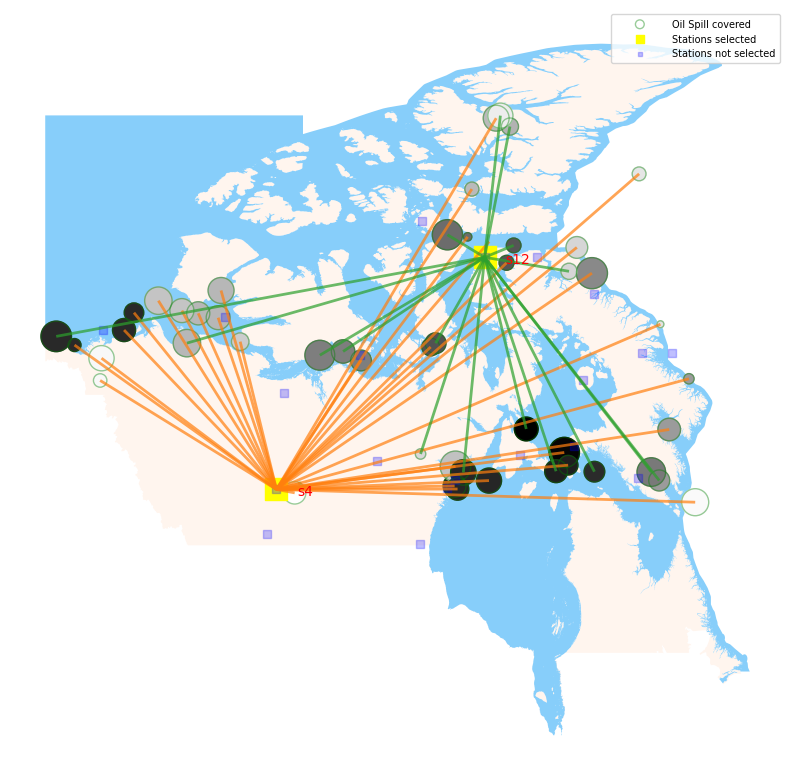

In [26]:
model_analysis.draw_network_diagram(DistanceMax, NumberStMax, Sensitivity_R, spill_df, station_df, ResponseTimeT, coverage_percentage,
                         assignment, deploy_1s, select_1s)

In [27]:
assignment

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed
0,o202,s4,62.599998,-113.190002,64.319290,-78.576790,i,36.969675
1,o203,s4,62.599998,-113.190002,65.388885,-65.952179,i,36.969675
2,o59,s4,62.599998,-113.190002,62.767265,-91.764305,i,157.000000
3,o23,s4,62.599998,-113.190002,71.380615,-127.397705,i,7.000000
4,o197,s4,62.599998,-113.190002,70.823013,-130.330658,i,7.000000
5,o110,s4,62.599998,-113.190002,77.280266,-69.575424,i,7.000000
6,o7,s4,62.599998,-113.190002,70.286461,-67.008385,c,31.000000
7,o108,s4,62.599998,-113.190002,74.130417,-87.605370,c,31.000000
8,o192,s4,62.599998,-113.190002,68.705536,-134.233826,c,110.000000
9,o212,s4,62.599998,-113.190002,62.443607,-111.002525,c,110.000000


In [28]:
display(assignment)
display(deploy_1s)

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed
0,o202,s4,62.599998,-113.190002,64.319290,-78.576790,i,36.969675
1,o203,s4,62.599998,-113.190002,65.388885,-65.952179,i,36.969675
2,o59,s4,62.599998,-113.190002,62.767265,-91.764305,i,157.000000
3,o23,s4,62.599998,-113.190002,71.380615,-127.397705,i,7.000000
4,o197,s4,62.599998,-113.190002,70.823013,-130.330658,i,7.000000
5,o110,s4,62.599998,-113.190002,77.280266,-69.575424,i,7.000000
6,o7,s4,62.599998,-113.190002,70.286461,-67.008385,c,31.000000
7,o108,s4,62.599998,-113.190002,74.130417,-87.605370,c,31.000000
8,o192,s4,62.599998,-113.190002,68.705536,-134.233826,c,110.000000
9,o212,s4,62.599998,-113.190002,62.443607,-111.002525,c,110.000000


o202  s4   i     36.969675
o203  s4   i     36.969675
o19   s12  m    100.000000
o59   s4   i    157.000000
o23   s4   i      7.000000
o197  s4   i      7.000000
o110  s4   i      7.000000
o7    s4   c     31.000000
o108  s4   c     31.000000
o192  s4   c    110.000000
o212  s4   c    110.000000
o222  s4   i     36.969675
o135  s4   i     36.969675
o218  s4   c      5.000000
o181  s4   i    157.000000
o52   s12  m      2.000000
o79   s12  m    100.000000
o67   s12  m    100.000000
o103  s12  m      2.000000
o27   s12  m     20.000000
o42   s4   i      7.000000
o191  s4   c    110.000000
o100  s4   i    157.000000
o37   s4   c    110.000000
o134  s12  m    100.000000
o43   s4   i     36.969675
o137  s4   i    157.000000
o73   s4   c    110.000000
o115  s12  m     20.000000
o142  s12  m      2.000000
o116  s4   c     31.000000
o66   s4   c      5.000000
o16   s4   i      7.000000
o86   s12  m      2.000000
o78   s12  m      2.000000
o45   s4   i     36.969675
o41   s4   c    110.000000
o

In [29]:
deploy_reset = deploy_1s.reset_index()
deploy_reset.columns = ['Station no.', 'Spill #', 'Resource Type', 'Quantity deployed']

In [30]:
display(assignment)

,Spill #,Station no.,St_Latitude,St_Longitude,Spill_Latitude,Spill_Longitude,Resource Type,Quantity deployed
0,o202,s4,62.599998,-113.190002,64.319290,-78.576790,i,36.969675
1,o203,s4,62.599998,-113.190002,65.388885,-65.952179,i,36.969675
2,o59,s4,62.599998,-113.190002,62.767265,-91.764305,i,157.000000
3,o23,s4,62.599998,-113.190002,71.380615,-127.397705,i,7.000000
4,o197,s4,62.599998,-113.190002,70.823013,-130.330658,i,7.000000
5,o110,s4,62.599998,-113.190002,77.280266,-69.575424,i,7.000000
6,o7,s4,62.599998,-113.190002,70.286461,-67.008385,c,31.000000
7,o108,s4,62.599998,-113.190002,74.130417,-87.605370,c,31.000000
8,o192,s4,62.599998,-113.190002,68.705536,-134.233826,c,110.000000
9,o212,s4,62.599998,-113.190002,62.443607,-111.002525,c,110.000000


NameError: name 'lc_m' is not defined

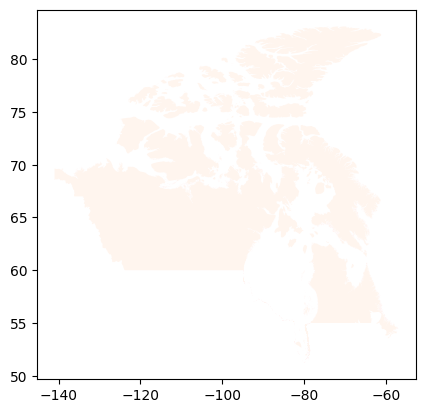

In [31]:
from matplotlib import collections as mc
import matplotlib.pyplot as plt
unique_stations = assignment['Station no.'].unique()

fig, ax = plt.subplots()
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticLand.plot(ax=ax, color="seashell")

for ust in range(len(unique_stations)):
    d1 = assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()
    d_m = pd.DataFrame(d1.loc[d1['Resource Type'] == 'm'].copy())
    d_c = d1.loc[d1['Resource Type'] == 'c'].copy()
    d_i = d1.loc[d1['Resource Type'] == 'i'].copy()

    new_list_m = []
    for r1 in range(d_m.shape[0]):
        new_list_m.append([(d_m.loc[r1, 'Spill_Longitude'], d_m.loc[r1, 'Spill_Latitude']), (d_m.loc[r1, 'St_Longitude'], d_m.loc[r1, 'St_Latitude'])])
        # d_m.loc[2, 'Spill_Longitude']
        # new_list_m.append([(d_m.Spill_Longitude[r1], d_m.Spill_Latitude[r1]), (d_m.St_Longitude[r1], d_m.St_Latitude[r1])])
        lc_m = mc.LineCollection(new_list_m, colors=f'C{ust + 1}',
                           alpha=.7, linestyle='dashed')  # 'Resource Type' alpha = (ust/len(unique_stations)), colors=ust, linewidths=[1,5,10],
    ax.add_collection(lc_m)

In [ ]:
d_m.loc[2, 'Spill_Longitude']

In [ ]:
d_m.Spill_Longitude[0]

In [ ]:
    new_list_c = []
    for r2 in range(d_c.shape[0]):
        new_list_c.append([(d_c.Spill_Longitude[r2], d_c.Spill_Latitude[r2]), (d_c.St_Longitude[r2], d_c.St_Latitude[r2])])
        lc_c = mc.LineCollection(new_list_c, colors=f'C{ust + 1}',
                           alpha=.7, linestyle='solid')  # 'Resource Type' alpha = (ust/len(unique_stations)), colors=ust, linewidths=[1,5,10],
    new_list_i = []
    for r3 in range(d_i.shape[0]):
        new_list_i.append([(d_i.Spill_Longitude[r3], d_i.Spill_Latitude[r3]), (d_i.St_Longitude[r3], d_i.St_Latitude[r3])])
        lc_i = mc.LineCollection(new_list_i, colors=f'C{ust + 1}',
                           alpha=.7, linestyle='dotted')  # 'Resource Type' alpha = (ust/len(unique_stations)), colors=ust, linewidths=[1,5,10],
    ax.add_collection(lc_m)
    ax.add_collection(lc_c)


In [ ]:
print(d_m.shape)
print(d1.shape) #.Spill_Longitude[1]
print(d_m.shape[0])
display(d1)
display(d_m)

In [ ]:
d_m
#df.loc[df['col1'] == value]

In [ ]:
assignment.loc[assignment['Station no.'] == unique_stations[ust]].reset_index()

# Multiscene

In [ ]:
import multiscene
#import gurobipy as gp
#from gurobipy import GRB

In [ ]:
multiscene.analyze_multiscene(model, Stations, OilSpills, ResourcesD, Demand, deploy, select)